In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [517]:
df = pd.read_csv(r'D:\Finplat\data\processed\MSFT_optimal.csv')
df.head(2)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI_14,EMA_12,...,Oil_Return,Oil_Correlation,VIX_Price,VIX_Return,VIX_Correlation,Interest_Rate,Interest_Rate_Change,Interest_Rate_Correlation,TTM_Dividends,Dividend_Yield
0,2022-04-19,272.334473,278.953249,271.388934,278.105164,22297700,0.0,0.0,28.253674,283.587481,...,-0.052213,-0.256726,21.370001,-0.036085,-0.804165,2.913,0.01782,-0.186682,2.36,0.848600
1,2022-04-20,282.101710,282.394163,278.173343,279.138367,22906700,0.0,0.0,29.997081,282.903002,...,0.001853,-0.249421,20.320000,-0.049134,-0.777504,2.840,-0.02506,-0.198708,2.36,0.845459


In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       730 non-null    object 
 1   Open                       730 non-null    float64
 2   High                       730 non-null    float64
 3   Low                        730 non-null    float64
 4   Close                      730 non-null    float64
 5   Volume                     730 non-null    int64  
 6   Dividends                  730 non-null    float64
 7   Stock Splits               730 non-null    float64
 8   RSI_14                     730 non-null    float64
 9   EMA_12                     730 non-null    float64
 10  EMA_26                     730 non-null    float64
 11  MACD                       730 non-null    float64
 12  MACD_Signal                730 non-null    float64
 13  BB_Middle                  730 non-null    float64

In [519]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'RSI_14', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal',
       'BB_Middle', 'BB_Std', 'BB_Width', 'ATR_14', 'ATR_Pct', 'ROC_10', 'OBV',
       'SP500_Price', 'SP500_Return', 'Beta_SP500', 'Gold_Price',
       'Gold_Return', 'Gold_Correlation', 'Oil_Price', 'Oil_Return',
       'Oil_Correlation', 'VIX_Price', 'VIX_Return', 'VIX_Correlation',
       'Interest_Rate', 'Interest_Rate_Change', 'Interest_Rate_Correlation',
       'TTM_Dividends', 'Dividend_Yield'],
      dtype='object')

In [520]:
df.isnull().sum()

Date                         0
Open                         0
High                         0
Low                          0
Close                        0
Volume                       0
Dividends                    0
Stock Splits                 0
RSI_14                       0
EMA_12                       0
EMA_26                       0
MACD                         0
MACD_Signal                  0
BB_Middle                    0
BB_Std                       0
BB_Width                     0
ATR_14                       0
ATR_Pct                      0
ROC_10                       0
OBV                          0
SP500_Price                  0
SP500_Return                 0
Beta_SP500                   0
Gold_Price                   0
Gold_Return                  0
Gold_Correlation             0
Oil_Price                    0
Oil_Return                   0
Oil_Correlation              0
VIX_Price                    0
VIX_Return                   0
VIX_Correlation              0
Interest

In [521]:
df['Date'] = pd.to_datetime(df['Date'])

In [522]:
df.set_index('Date',inplace=True)

In [523]:
df.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,RSI_14,EMA_12,EMA_26,...,Oil_Return,Oil_Correlation,VIX_Price,VIX_Return,VIX_Correlation,Interest_Rate,Interest_Rate_Change,Interest_Rate_Correlation,TTM_Dividends,Dividend_Yield
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-19,272.334473,278.953249,271.388934,278.105164,22297700,0.0,0.0,28.253674,283.587481,287.531084,...,-0.052213,-0.256726,21.370001,-0.036085,-0.804165,2.913,0.01782,-0.186682,2.36,0.848600
2022-04-20,282.101710,282.394163,278.173343,279.138367,22906700,0.0,0.0,29.997081,282.903002,286.909401,...,0.001853,-0.249421,20.320000,-0.049134,-0.777504,2.840,-0.02506,-0.198708,2.36,0.845459


In [524]:
def prepare_features(df):
    # Create a copy to avoid modifying the original
    processed_df = df.copy()
    
    # Store the date index for later use
    date_index = processed_df.index
    
    # 1. Shift all columns except Date (assuming Date is the index)
    cols_to_shift = [col for col in processed_df.columns]
    processed_df[cols_to_shift] = processed_df[cols_to_shift].shift(1)
    
    # 2. Add calendar features (these don't need shifting since they're derived from the index)
    processed_df['day_of_week'] = date_index.dayofweek
    processed_df['day_of_month'] = date_index.day
    processed_df['month'] = date_index.month
    processed_df['year'] = date_index.year
    processed_df['quarter'] = date_index.quarter
    processed_df['is_month_end'] = date_index.is_month_end.astype(int)
    processed_df['is_quarter_end'] = date_index.is_quarter_end.astype(int)
    
    # 3. Create target variable (next day's return - this is what we want to predict)
    processed_df['target_return'] = df['Close'].pct_change().shift(-1)
    
    # 4. Drop the first row which will have NaNs due to shifting
    processed_df = processed_df.dropna(subset=[cols_to_shift[0]])
    processed_df = processed_df.dropna(subset=['target_return'])
    return processed_df

df = prepare_features(df)

In [525]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 728 entries, 2022-04-20 to 2025-03-14
Data columns (total 44 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Open                       728 non-null    float64
 1   High                       728 non-null    float64
 2   Low                        728 non-null    float64
 3   Close                      728 non-null    float64
 4   Volume                     728 non-null    float64
 5   Dividends                  728 non-null    float64
 6   Stock Splits               728 non-null    float64
 7   RSI_14                     728 non-null    float64
 8   EMA_12                     728 non-null    float64
 9   EMA_26                     728 non-null    float64
 10  MACD                       728 non-null    float64
 11  MACD_Signal                728 non-null    float64
 12  BB_Middle                  728 non-null    float64
 13  BB_Std                     728 

In [526]:
df.isnull().sum()

Open                         0
High                         0
Low                          0
Close                        0
Volume                       0
Dividends                    0
Stock Splits                 0
RSI_14                       0
EMA_12                       0
EMA_26                       0
MACD                         0
MACD_Signal                  0
BB_Middle                    0
BB_Std                       0
BB_Width                     0
ATR_14                       0
ATR_Pct                      0
ROC_10                       0
OBV                          0
SP500_Price                  0
SP500_Return                 0
Beta_SP500                   0
Gold_Price                   0
Gold_Return                  0
Gold_Correlation             0
Oil_Price                    0
Oil_Return                   0
Oil_Correlation              0
VIX_Price                    0
VIX_Return                   0
VIX_Correlation              0
Interest_Rate                0
Interest

In [527]:
from scipy import stats

In [528]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd

def automated_feature_transformation_with_viz(df, exclude_cols=None, n_cols=3, figsize=(15, 4)):
    """
    Automatically transform features based on their statistical properties and visualize before/after.
    
    Args:
        df: DataFrame with features
        exclude_cols: List of columns to exclude from transformation
        n_cols: Number of columns in the visualization grid
        figsize: Base figure size per subplot
    
    Returns:
        transformed_df: DataFrame with transformed features
        transforms: Dictionary of transformations applied
    """
    exclude_cols = exclude_cols or []
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    numeric_cols = [col for col in numeric_cols if col not in exclude_cols]
    
    transformed_df = df.copy()
    transforms = {}
    
    # Track columns to visualize
    viz_data = []
    
    for col in numeric_cols:
        # Skip columns with too few unique values (likely categorical)
        if df[col].nunique() < 5:
            continue
            
        # Get clean data for analysis
        clean_data = df[col].dropna()
        if len(clean_data) < 10:  # Need reasonable sample size
            continue
            
        # Calculate statistics
        skew_val = stats.skew(clean_data)
        kurt_val = stats.kurtosis(clean_data)
        
        # Determine transformation
        transform_type = "none"
        transformed_data = df[col].copy()  # Default to original
        
        # High positive skew - try log transformation
        if skew_val > 1:
            # Adjust for zero/negative values if needed
            if clean_data.min() <= 0:
                shift = abs(clean_data.min()) + 1
                transformed_data = np.log(df[col] + shift)
                transform_type = f"log(x + {shift})"
            else:
                transformed_data = np.log(df[col])
                transform_type = "log"
                
        # High negative skew - try square transformation
        elif skew_val < -1:
            transformed_data = df[col]**2
            transform_type = "square"
            
        # High kurtosis - try Box-Cox
        elif kurt_val > 3 and clean_data.min() > 0:
            try:
                bc_data, lambda_val = stats.boxcox(clean_data)
                transformed_data = pd.Series(
                    stats.boxcox(df[col].dropna(), lambda_val),
                    index=df[col].dropna().index
                )
                transform_type = f"boxcox(lambda={lambda_val:.2f})"
            except Exception as e:
                print(f"Box-Cox failed for {col}: {e}")
                # Box-Cox requires strictly positive data
                pass
        
        # Save transformation details
        transforms[col] = transform_type
        
        # Apply the transformation to the DataFrame if needed
        if transform_type != "none":
            transformed_df[col] = transformed_data
            
            # Store data for visualization
            orig_skew = skew_val
            trans_skew = stats.skew(transformed_data.dropna())
            viz_data.append({
                'column': col,
                'transform': transform_type,
                'original_data': df[col],
                'transformed_data': transformed_data,
                'original_skew': orig_skew,
                'transformed_skew': trans_skew
            })
    
    # Report on transformations
    print("Transformations applied:")
    for col, transform in transforms.items():
        if transform != "none":
            print(f"- {col}: {transform} (skew: {stats.skew(df[col].dropna()):.2f} → {stats.skew(transformed_df[col].dropna()):.2f})")
    
    # Visualize transformations
    if viz_data:
        n_transforms = len(viz_data)
        n_rows = (n_transforms + n_cols - 1) // n_cols  # Ceiling division
        
        plt.figure(figsize=(figsize[0] * n_cols, figsize[1] * n_rows))
        
        for i, data in enumerate(viz_data):
            # Plot original distribution
            plt.subplot(n_rows, n_cols * 2, i * 2 + 1)
            sns.histplot(data['original_data'].dropna(), kde=True)
            plt.title(f"{data['column']}\nSkew: {data['original_skew']:.2f}")
            
            # Plot transformed distribution
            plt.subplot(n_rows, n_cols * 2, i * 2 + 2)
            sns.histplot(data['transformed_data'].dropna(), kde=True, color='orange')
            plt.title(f"{data['transform']}\nSkew: {data['transformed_skew']:.2f}")
        
        plt.tight_layout()
        #plt.show()
    
    return transformed_df, transforms

In [529]:
"""transformed_df, transforms = automated_feature_transformation_with_viz(
    df, 
    exclude_cols=['Date', 'target_return'],  # Exclude columns you don't want to transform
    n_cols=3  # Number of columns in the visualization grid
)"""

"transformed_df, transforms = automated_feature_transformation_with_viz(\n    df, \n    exclude_cols=['Date', 'target_return'],  # Exclude columns you don't want to transform\n    n_cols=3  # Number of columns in the visualization grid\n)"

In [530]:
df.to_csv(r'D:\Finplat\data\processed\MSFT_modelling.csv')

In [531]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'RSI_14', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'BB_Middle',
       'BB_Std', 'BB_Width', 'ATR_14', 'ATR_Pct', 'ROC_10', 'OBV',
       'SP500_Price', 'SP500_Return', 'Beta_SP500', 'Gold_Price',
       'Gold_Return', 'Gold_Correlation', 'Oil_Price', 'Oil_Return',
       'Oil_Correlation', 'VIX_Price', 'VIX_Return', 'VIX_Correlation',
       'Interest_Rate', 'Interest_Rate_Change', 'Interest_Rate_Correlation',
       'TTM_Dividends', 'Dividend_Yield', 'day_of_week', 'day_of_month',
       'month', 'year', 'quarter', 'is_month_end', 'is_quarter_end',
       'target_return'],
      dtype='object')

In [532]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'RSI_14', 'EMA_12', 'EMA_26', 'MACD', 'MACD_Signal', 'BB_Middle',
       'BB_Std', 'BB_Width', 'ATR_14', 'ATR_Pct', 'ROC_10', 'OBV',
       'SP500_Price', 'SP500_Return', 'Beta_SP500', 'Gold_Price',
       'Gold_Return', 'Gold_Correlation', 'Oil_Price', 'Oil_Return',
       'Oil_Correlation', 'VIX_Price', 'VIX_Return', 'VIX_Correlation',
       'Interest_Rate', 'Interest_Rate_Change', 'Interest_Rate_Correlation',
       'TTM_Dividends', 'Dividend_Yield', 'day_of_week', 'day_of_month',
       'month', 'year', 'quarter', 'is_month_end', 'is_quarter_end',
       'target_return'],
      dtype='object')

Using features: ['RSI_14', 'MACD', 'ATR_Pct', 'SP500_Return', 'BB_Middle', 'day_of_week']
Performing walk-forward ensemble validation with 5 steps...


  0%|          | 0/5 [00:00<?, ?it/s]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 20%|██        | 1/5 [00:02<00:10,  2.67s/it]d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finpl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 40%|████      | 2/5 [00:05<00:08,  2.68s/it]d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finpl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 60%|██████    | 3/5 [00:08<00:06,  3.11s/it]d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finpl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
 80%|████████  | 4/5 [00:11<00:03,  3.04s/it]d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finpl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\bas

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

d:\Finplat\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
d:\Finplat\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
100%|██████████| 5/5 [00:14<00:00,  2.99s/it]



Walk-Forward Ensemble Validation Results:
Total periods tested: 5
Overall Direction Accuracy: 0.5700
Overall Sharpe Ratio: -0.1045
Overall Correlation: 0.0787 (p-value: 0.4364)


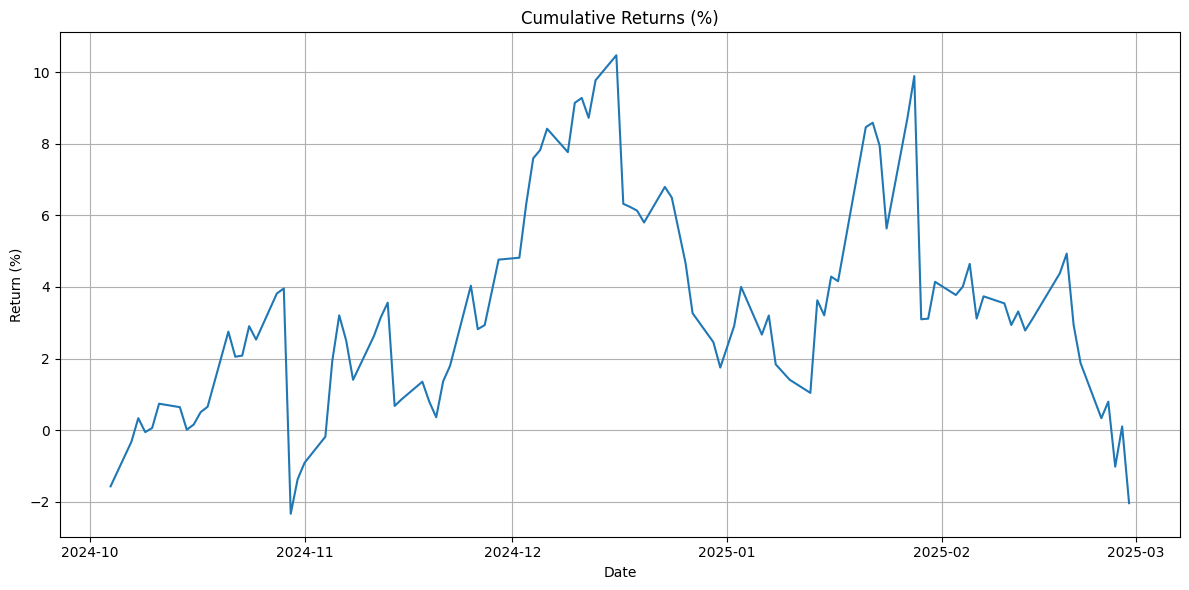

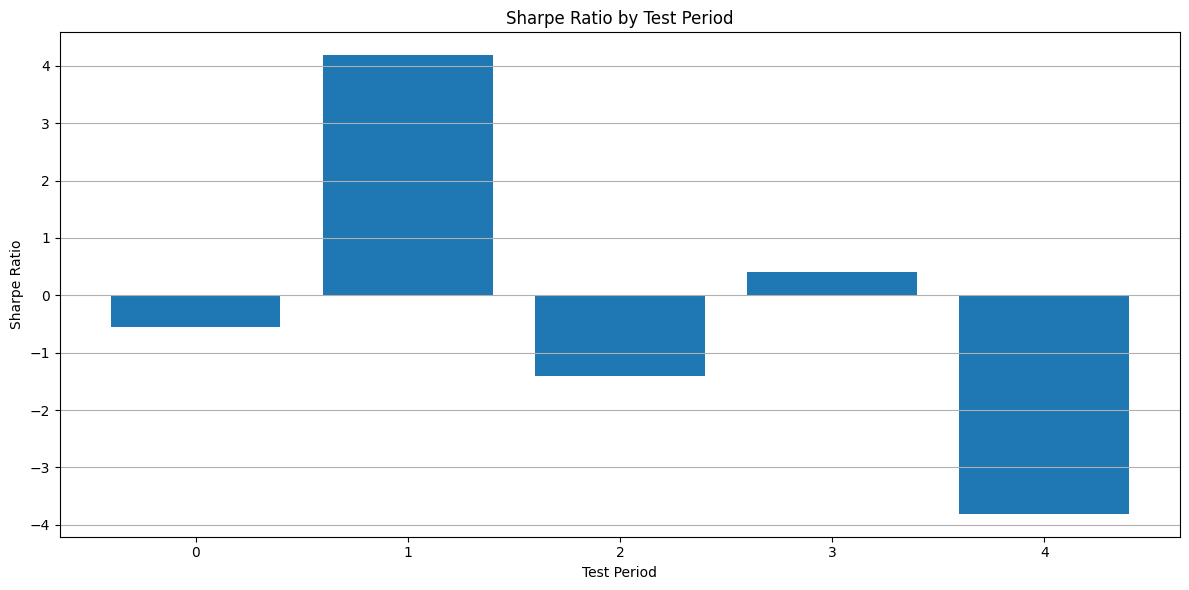

In [533]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from statsmodels.tsa.statespace.sarimax import SARIMAX
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def create_day_of_week_feature(df):
    """
    Create day of week feature as numeric encoding
    
    Args:
        df (pd.DataFrame): Input DataFrame with datetime index
    
    Returns:
        pd.Series: Day of week as numeric feature
    """
    return df.index.dayofweek.astype(float)

def walk_forward_ensemble_validation(
    data_path, 
    target_column='target_return', 
    initial_train_size=0.85, 
    step_size=20, 
    window_type='expanding', 
    test_size=20,
    random_state=42,
    ensemble_method='weighted'
):
    """
    Perform walk-forward cross-validation with an ensemble of SARIMAX and LightGBM models.
    
    Uses a focused set of features:
    - RSI_14
    - MACD (assuming you meant MACD)
    - ATR_Pct
    - SP500_Return
    - Bollinger Band feature (BB_Width)
    - Day of Week
    """
    # 1. Data Loading and Preprocessing
    df = pd.read_csv(data_path)
    
    # Convert date to datetime and set as index
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])
        df.set_index('Date', inplace=True)
    
    # 2. Feature Selection and Preparation
    # Specific feature list
    selected_features = [
        'RSI_14',  # Relative Strength Index
        'MACD',  # MACD Histogram (assuming you meant MACD)
        'ATR_Pct',  # ATR Percentage 
        'SP500_Return',  # S&P 500 Return  # Bollinger Band Width
        'BB_Middle'
    ]
    
    # Add day of week feature
    df['day_of_week'] = create_day_of_week_feature(df)
    selected_features.append('day_of_week')
    
    # Check feature availability
    available_features = [f for f in selected_features if f in df.columns]
    print(f"Using features: {available_features}")
    
    # Verify all required features exist
    missing_features = set(selected_features) - set(available_features)
    if missing_features:
        raise ValueError(f"Missing features: {missing_features}")
    
    # Prepare feature matrix and target
    X = df[available_features]
    y = df[target_column]
    
    # Initialize variables to store results
    all_predictions = []
    all_actuals = []
    all_dates = []
    model_performances = []
    
    # Define initial training set size
    init_train_size = int(len(df) * initial_train_size)
    
    # Define total number of steps
    total_steps = (len(df) - init_train_size - test_size) // step_size + 1
    
    print(f"Performing walk-forward ensemble validation with {total_steps} steps...")
    
    # 3. Walk-Forward Validation Loop
    for i in tqdm(range(total_steps)):
        # Define current training window end
        if window_type == 'expanding':
            train_end = init_train_size + i * step_size
            train_start = 0
        else:  # rolling window
            train_end = init_train_size + i * step_size
            train_start = max(0, train_end - init_train_size)
        
        # Define test window
        test_start = train_end
        test_end = min(test_start + test_size, len(df))
        
        if test_end - test_start < 5:  # Skip if test set is too small
            continue
        
        # Split data
        X_train = X.iloc[train_start:train_end]
        y_train = y.iloc[train_start:train_end]
        
        X_test = X.iloc[test_start:test_end]
        y_test = y.iloc[test_start:test_end]
        
        # Preprocessing
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Model 1: LightGBM
        try:
            # LightGBM Parameters
            lgb_params = {
                'objective': 'regression',
                'metric': 'mse',
                'boosting_type': 'gbdt',
                'num_leaves': 31,
                'learning_rate': 0.05,
                'feature_fraction': 0.9,
                'bagging_fraction': 0.8,
                'bagging_freq': 5,
                'verbose': 0,
                'seed': random_state
            }
            
            # Prepare LightGBM datasets
            train_data = lgb.Dataset(X_train_scaled, label=y_train)
            
            # Train LightGBM model
            lgb_model = lgb.train(
                lgb_params, 
                train_data, 
                num_boost_round=100,
                
            )
            
            # LightGBM Predictions
            lgb_predictions = lgb_model.predict(X_test_scaled)
        except Exception as e:
            print(f"LightGBM Error: {e}")
            continue
        
        # Model 2: SARIMAX
        try:
            # Prepare SARIMAX model
            sarimax_model = SARIMAX(
                y_train,
                exog=X_train,
                order=(4, 0, 1),  # Example SARIMA order
                enforce_stationarity=False,
                enforce_invertibility=False
            )
            
            # Fit SARIMAX model
            sarimax_results = sarimax_model.fit(disp=0)
            
            # SARIMAX Predictions
            sarimax_predictions = sarimax_results.forecast(
                steps=len(X_test), 
                exog=X_test
            )
        except Exception as e:
            print(f"SARIMAX Error: {e}")
            continue
        
        # 4. Ensemble Methods
        if ensemble_method == 'weighted':
            # Simple weighted average (you can adjust weights)
            ensemble_predictions = 0.5 * lgb_predictions + 0.5 * sarimax_predictions
        
        elif ensemble_method == 'stacking':
            from sklearn.model_selection import TimeSeriesSplit
            tscv = TimeSeriesSplit(n_splits=5)
            meta_train = np.zeros((len(X_train), 2))  # Two base predictions per sample
            
            # Generate out-of-fold predictions for the training set
            for train_index, val_index in tscv.split(X_train):
                X_train_fold = X_train.iloc[train_index]
                y_train_fold = y_train.iloc[train_index]
                X_val_fold = X_train.iloc[val_index]
                
                # Scale fold data separately (to mimic the full pipeline)
                scaler_fold = StandardScaler()
                X_train_fold_scaled = scaler_fold.fit_transform(X_train_fold)
                X_val_fold_scaled = scaler_fold.transform(X_val_fold)
                
                # Base Model 1: LightGBM on the fold
                lgb_train_data_fold = lgb.Dataset(X_train_fold_scaled, label=y_train_fold)
                lgb_model_fold = lgb.train(
                    lgb_params,
                    lgb_train_data_fold,
                    num_boost_round=100
                )
                lgb_val_preds = lgb_model_fold.predict(X_val_fold_scaled)
                
                # Base Model 2: SARIMAX on the fold (no scaling required)
                try:
                    sarimax_model_fold = SARIMAX(
                        y_train_fold,
                        exog=X_train_fold,
                        order=(4, 0, 1),
                        enforce_stationarity=False,
                        enforce_invertibility=False
                    )
                    sarimax_results_fold = sarimax_model_fold.fit(disp=0)
                    sarimax_val_preds = sarimax_results_fold.forecast(steps=len(X_val_fold), exog=X_val_fold)
                except Exception as e:
                    print(f"SARIMAX Error in CV: {e}")
                    sarimax_val_preds = np.zeros(len(X_val_fold))
                
                # Store the out-of-fold predictions for meta training
                meta_train[val_index, 0] = lgb_val_preds
                meta_train[val_index, 1] = sarimax_val_preds
            
            # Train the meta-model on out-of-fold predictions and true y_train
            meta_model = LinearRegression()
            meta_model.fit(meta_train, y_train)
            
            # For the test set, use the base models already trained on the full training data (above)
            meta_test = np.column_stack([lgb_predictions, sarimax_predictions])
            ensemble_predictions = meta_model.predict(meta_test)

            
        else:
            raise ValueError("Invalid ensemble method")
        
        # Performance Metrics
        actuals = y_test.values
        
        direction_accuracy = np.mean((actuals > 0) == (ensemble_predictions > 0))
        
        try:
            correlation, p_value = pearsonr(actuals, ensemble_predictions)
        except:
            correlation, p_value = 0, 1
        
        # Trading strategy returns
        trade_returns = actuals * np.sign(ensemble_predictions)
        sharpe_ratio = np.mean(trade_returns) / np.std(trade_returns) * np.sqrt(252) if np.std(trade_returns) > 0 else 0
        
        # Store performance for this step
        step_metrics = {
            'step': i,
            'train_start': X_train.index[0],
            'train_end': X_train.index[-1],
            'test_start': X_test.index[0],
            'test_end': X_test.index[-1],
            'direction_accuracy': direction_accuracy,
            'sharpe_ratio': sharpe_ratio,
            'correlation': correlation,
            'p_value': p_value,
            'mean_return': np.mean(trade_returns)
        }
        
        model_performances.append(step_metrics)
        
        # Store predictions and actuals
        all_predictions.extend(ensemble_predictions)
        all_actuals.extend(actuals)
        all_dates.extend(X_test.index)
    
    # 5. Performance Analysis
    # Convert results to DataFrame
    performance_df = pd.DataFrame(model_performances)
    
    # Overall metrics
    overall_direction_accuracy = np.mean((np.array(all_actuals) > 0) == (np.array(all_predictions) > 0))
    
    try:
        overall_correlation, overall_p = pearsonr(all_actuals, all_predictions)
    except:
        overall_correlation, overall_p = 0, 1
        
    overall_trade_returns = np.array(all_actuals) * np.sign(np.array(all_predictions))
    overall_sharpe = np.mean(overall_trade_returns) / np.std(overall_trade_returns) * np.sqrt(252) if np.std(overall_trade_returns) > 0 else 0
    
    # Results DataFrame
    results_df = pd.DataFrame({
        'Date': all_dates,
        'Actual': all_actuals,
        'Predicted': all_predictions,
        'Trade_Return': overall_trade_returns
    })
    
    # Cumulative returns
    results_df['Cumulative_Return'] = (1 + results_df['Trade_Return']).cumprod() - 1
    
    # Printing results
    print("\nWalk-Forward Ensemble Validation Results:")
    print(f"Total periods tested: {len(model_performances)}")
    print(f"Overall Direction Accuracy: {overall_direction_accuracy:.4f}")
    print(f"Overall Sharpe Ratio: {overall_sharpe:.4f}")
    print(f"Overall Correlation: {overall_correlation:.4f} (p-value: {overall_p:.4f})")
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(results_df['Date'], results_df['Cumulative_Return'] * 100)
    plt.title('Cumulative Returns (%)')
    plt.xlabel('Date')
    plt.ylabel('Return (%)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(performance_df)), performance_df['sharpe_ratio'])
    plt.title('Sharpe Ratio by Test Period')
    plt.xlabel('Test Period')
    plt.ylabel('Sharpe Ratio')
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()
    
    return {
        'overall_metrics': {
            'direction_accuracy': overall_direction_accuracy,
            'sharpe_ratio': overall_sharpe,
            'correlation': overall_correlation,
            'p_value': overall_p
        },
        'performance_by_period': performance_df,
        'results_df': results_df
    }

# Example usage
if __name__ == "__main__":
    cv_results = walk_forward_ensemble_validation(
        r'D:\Finplat\data\processed\MSFT_modelling.csv',
        initial_train_size=0.85,
        ensemble_method='stacking'  # or 'stacking'
    )